In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


Pyramid Lucas Kanade Algorithm

In [ ]:
def lucas_Kanade_optical_flow(old_image, new_image):
  feature_params = dict(maxCorners=100, qualityLevel=0.3,minDistance=7, blockSize=7)

  lk_params = dict(
      winSize=(15,15),
      maxLevel = 2,
      criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,0.03),
  )

  color = np.random.randint(0,255,(100,3))
  old_gray = cv2.cvtColor(old_image,cv2.COLOR_RGB2GRAY)
  p0 = cv2.goodFeaturesToTrack(old_gray,mask=None, **feature_params)

  mask = np.zeros_like(old_image)

  new_gray = cv2.cvtColor(new_image,cv2.COLOR_BGR2GRAY)
  p1,st,err = cv2.calcOpticalFlowPyrLK(old_gray,new_gray,p0,None,**lk_params)

  good_new = p1[st==1]
  good_old = p0[st==1]

  img = cv2.add(new_image,)

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np

def lucas_kanade_method(image1, image2):
    # Convert images to grayscale
    old_gray = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
    frame_gray = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # features for ShiTomasi corner detection
    feature_params = dict(maxCorners=100, qualityLevel=0.3, minDistance=7, blockSize=7)

    # features for Pyramid Lucas-Kanade optical flow
    lk_params = dict(
        winSize=(15, 15),
        maxLevel=2,
        criteria=(cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT, 10, 0.03),
    )

    p0 = cv2.goodFeaturesToTrack(old_gray, mask=None, **feature_params)

    p1, st, err = cv2.calcOpticalFlowPyrLK(old_gray, frame_gray, p0, None, **lk_params)

    good_new = p1[st == 1]
    good_old = p0[st == 1]

    mask = np.zeros_like(image1)

    # Draw the optical flow
    for i, (new, old) in enumerate(zip(good_new, good_old)):
        a, b = new.ravel().astype(int)
        c, d = old.ravel().astype(int)
        mask = cv2.line(mask, (a, b), (c, d), (0, 255, 0), 2)
        frame2 = cv2.circle(image2, (a, b), 5, (0, 0, 255), -1)

    # Display the result
    cv2_imshow(cv2.add(frame2, mask))



(480, 640, 3)
(480, 640, 3)


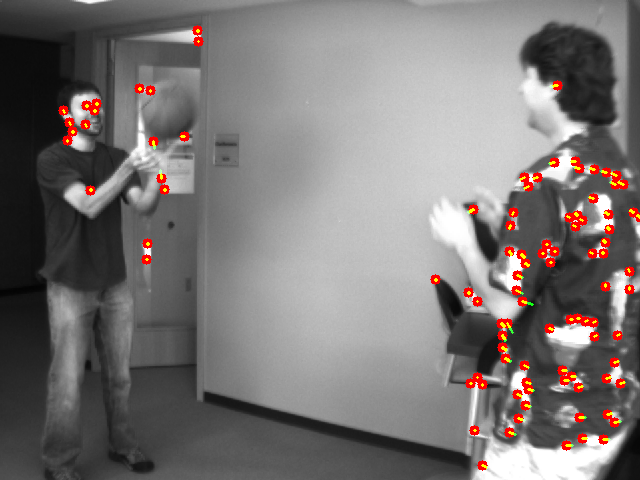

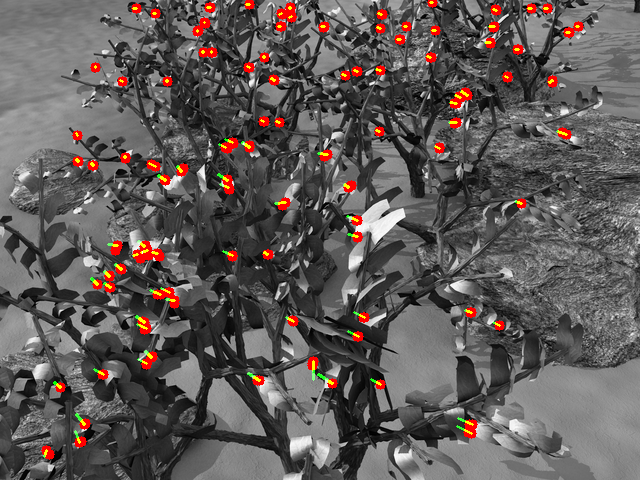

In [ ]:
image1 = cv2.imread('basketball1.png')
print(image1.shape)
image2 = cv2.imread('basketball2.png')
print(image2.shape)
lucas_kanade_method(image1, image2)
lucas_kanade_method(grove1,grove2)

## Dense Optical Flow Algorithm

In [ ]:
def dense_optical_flow(method,image1,image2,to_gray=False):
  old_image = image1

  # Creating HSV and Making a value constant
  hsv = np.zeros_like(old_image)
  hsv[...,1] = 255

  if to_gray:
    old_image = cv2.cvtColor(old_image, cv2.COLOR_BGR2GRAY)

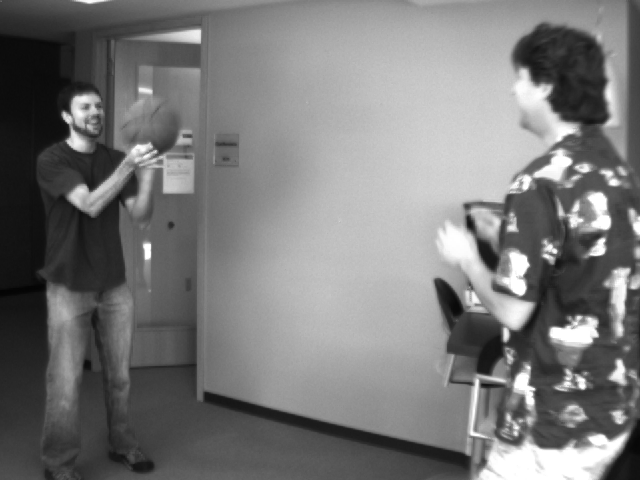

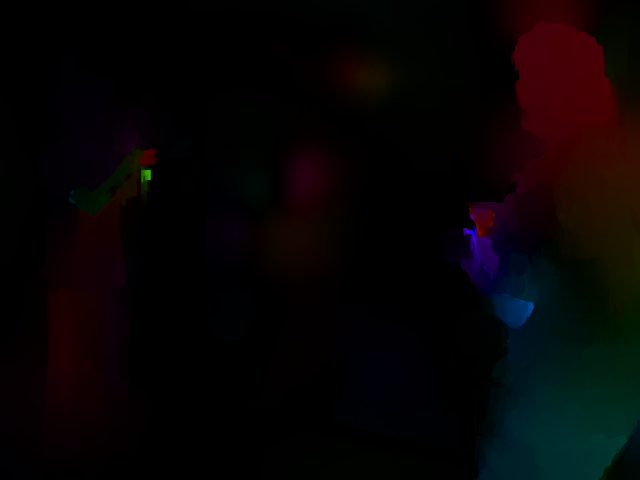

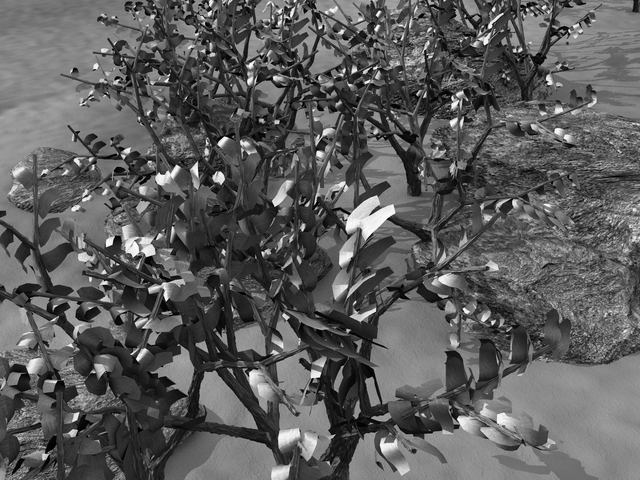

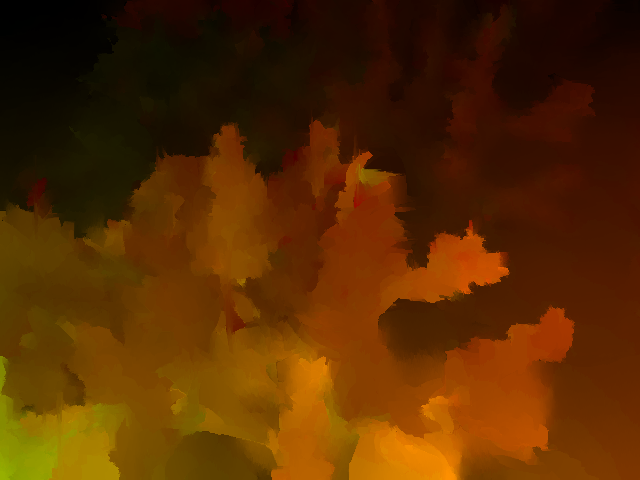

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

def dense_optical_flow(method, image1, image2, params=[], to_gray=False):
    old_frame = image1.copy()

    # HSV space
    hsv = np.zeros_like(old_frame)
    hsv[..., 1] = 255

    if to_gray:
        old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)
        image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

    # Calculating Optical Floq
    flow = method(old_frame, image2, None, *params)

    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    cv2_imshow(image1)
    cv2_imshow(bgr)

image1 = cv2.imread('basketball1.png')
image2 = cv2.imread('basketball2.png')
grove1 = cv2.imread('grove1.png')
grove2 = cv2.imread('grove2.png')
method = cv2.optflow.calcOpticalFlowSparseToDense

dense_optical_flow(method, image1, image2, to_gray=True)
dense_optical_flow(method, grove1, grove2, to_gray=True)


Farneback Optical Flow Algorithm

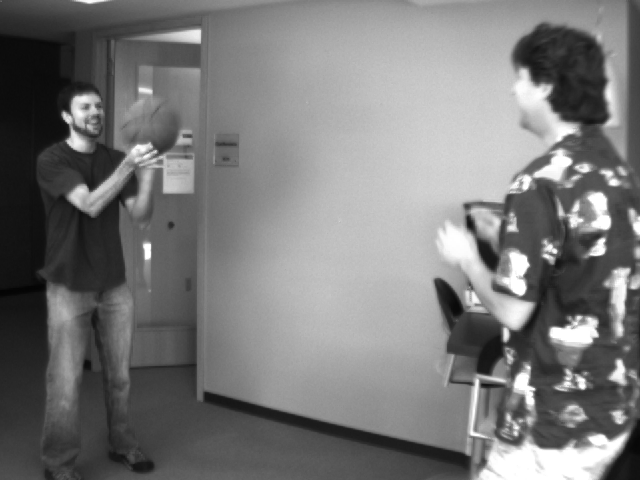

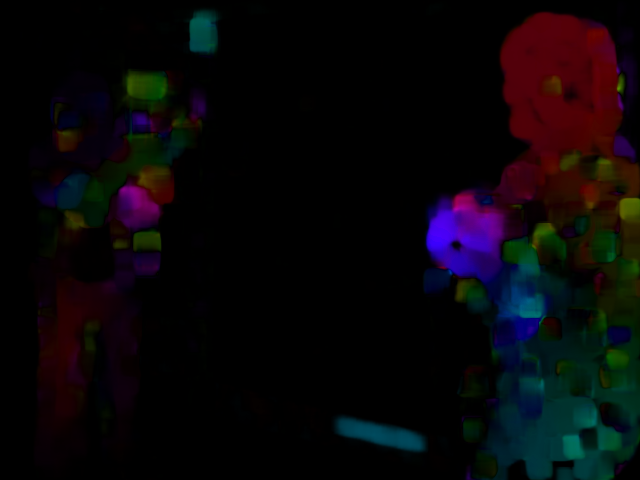

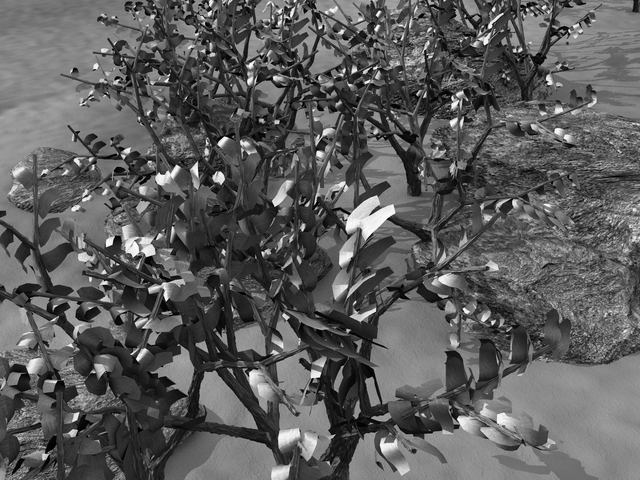

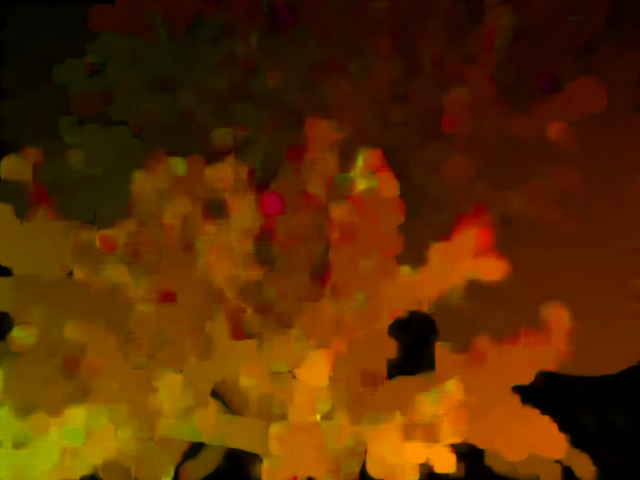

In [ ]:
method1 = cv2.calcOpticalFlowFarneback
params = [0.5, 3, 15, 3, 5, 1.2, 0]
dense_optical_flow(method1, image1, image2,params=params, to_gray=True)
dense_optical_flow(method1, grove1, grove2,params=params, to_gray=True)

RLOF Optical Flow Algorithm

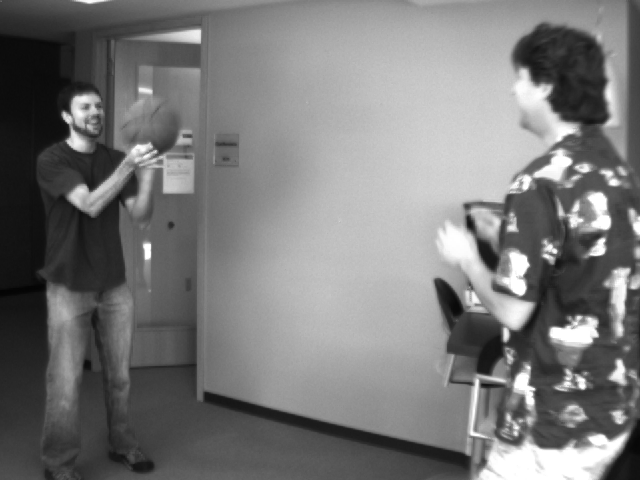

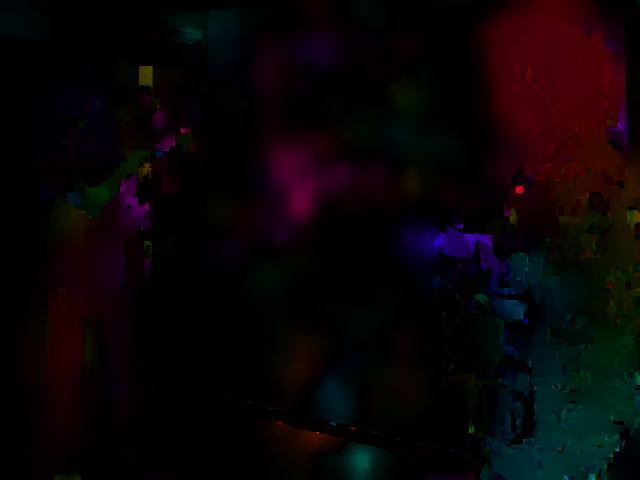

In [ ]:
RLOFmethod = cv2.optflow.calcOpticalFlowDenseRLOF
dense_optical_flow(RLOFmethod, image1, image2, to_gray=False)

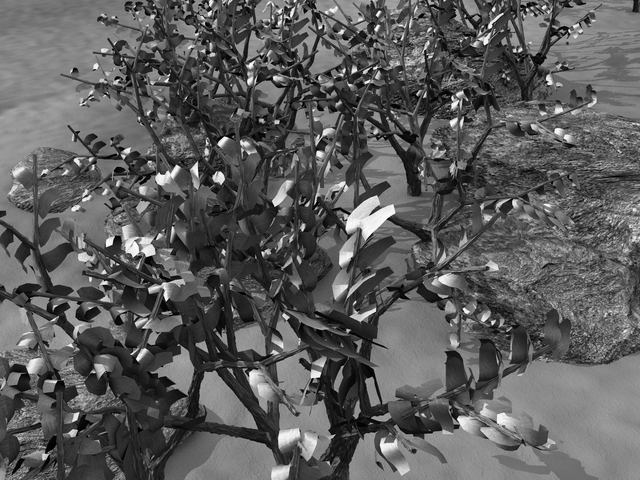

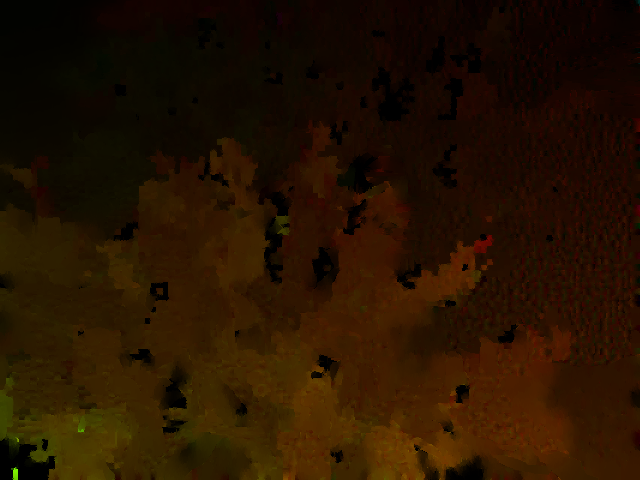

In [ ]:
RLOFmethod = cv2.optflow.calcOpticalFlowDenseRLOF
dense_optical_flow(RLOFmethod, grove1, grove2, to_gray=False)

Sparse RLOF

In [ ]:
def sparse_RLOF(img1,img2):
  gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  p0 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.01, minDistance=10)

  image1_color = cv2.cvtColor(gray1, cv2.COLOR_GRAY2BGR)
  image2_color = cv2.cvtColor(gray2, cv2.COLOR_GRAY2BGR)


  sparse_RLOF = cv2.optflow.calcOpticalFlowSparseRLOF
  p1, status, _ = sparse_RLOF(image1_color, image2_color, p0, None)

  p0 = p0[status == 1]
  p1 = p1[status == 1]

  for i, (new, old) in enumerate(zip(p1, p0)):
      a, b = new.ravel().astype(int)  # Convert to integers
      c, d = old.ravel().astype(int)  # Convert to integers
      image1_color = cv2.circle(image1_color, (c, d), 5, (0, 255, 0), -1)
      image1_color = cv2.line(image1_color, (c, d), (a, b), (255, 0, 0), 2)

  cv2_imshow(image1_color)
  cv2.waitKey(0)
  cv2.destroyAllWindows()

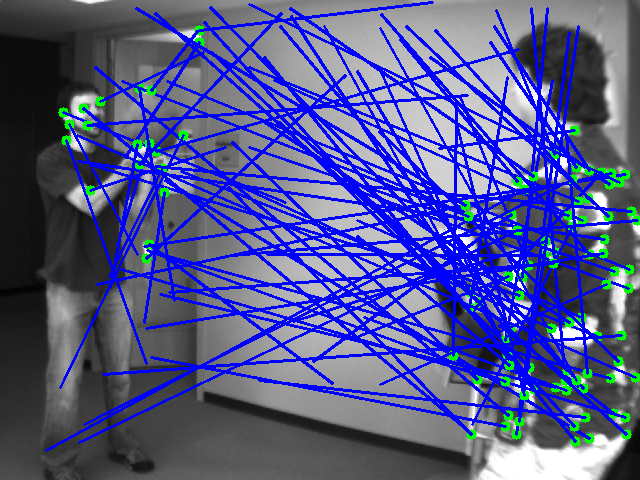

In [ ]:
sparse_RLOF(image1,image2)

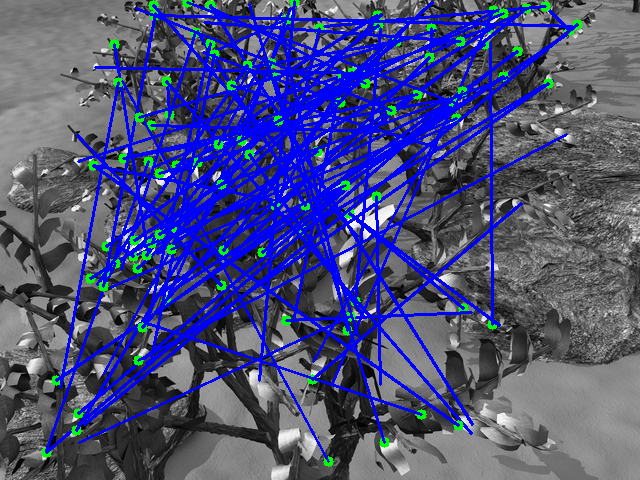

In [ ]:
sparse_RLOF(grove1,grove2)

PCA Flow

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
def PCAFlow(img1,img2):

  gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
  gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

  pca_flow = cv2.optflow.createOptFlow_PCAFlow()

  flow = pca_flow.calc(gray1, gray2, None)

  h, w = flow.shape[:2]
  flow_img = cv2.cvtColor(gray1, cv2.COLOR_GRAY2BGR)
  for y in range(0, h, 10):
      for x in range(0, w, 10):
          dx, dy = flow[y, x]
          cv2.line(flow_img, (x, y), (int(x + dx), int(y + dy)), (0, 255, 0), 1)
  cv2_imshow(flow_img)
  cv2.waitKey(0)
  cv2.destroyAllWindows()


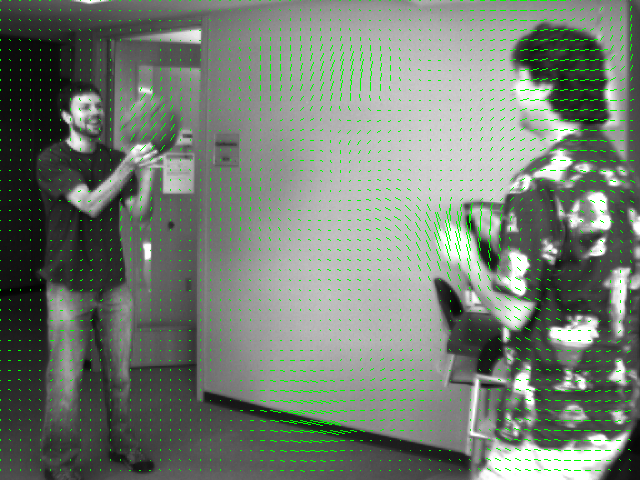

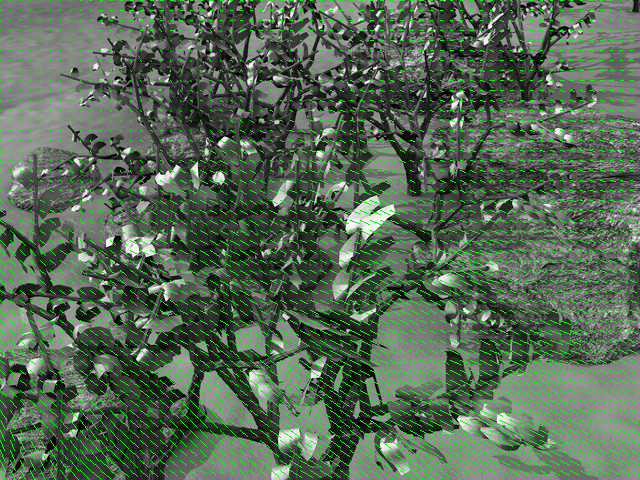

In [ ]:
img1 = cv2.imread('basketball1.png')
img2 = cv2.imread('basketball2.png')
img3 = cv2.imread('grove1.png')
img4 = cv2.imread('grove2.png')
PCAFlow(img1, img2)
PCAFlow(img3,img4)

In [ ]:
def SimpleFlow(img1, img2):

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    simple_flow = cv2.optflow.createOptFlow_SimpleFlow()


    flow = simple_flow.calc(gray1, gray2, None)


    h, w = flow.shape[:2]
    flow_img = cv2.cvtColor(gray1, cv2.COLOR_GRAY2BGR)
    for y in range(0, h, 10):
        for x in range(0, w, 10):
            dx, dy = flow[y, x]
            cv2.line(flow_img, (x, y), (int(x + dx), int(y + dy)), (0, 255, 0), 1)
    cv2_imshow(flow_img)

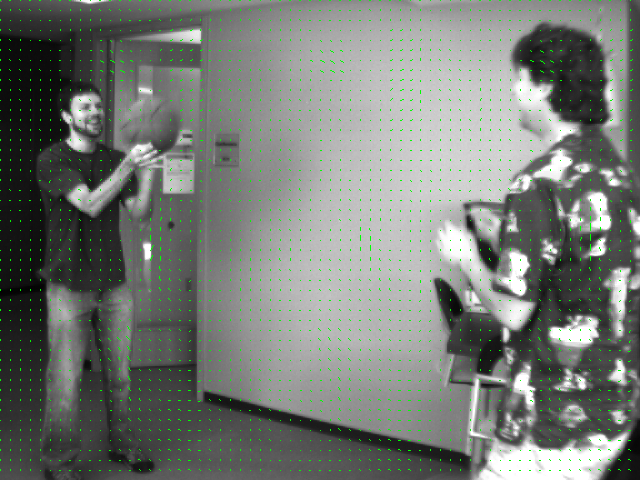

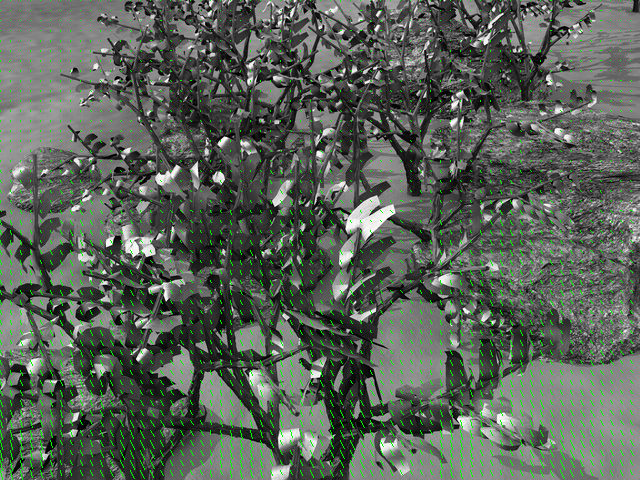

In [ ]:
img1 = cv2.imread('basketball1.png')
img2 = cv2.imread('basketball2.png')
img3 = cv2.imread('grove1.png')
img4 = cv2.imread('grove2.png')
SimpleFlow(img1, img2)
SimpleFlow(img3,img4)

Deep Flow

In [ ]:
def DeepFlow(img1, img2):

    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)


    deep_flow = cv2.optflow.createOptFlow_DeepFlow()

    flow = deep_flow.calc(gray1, gray2, None)

    h, w = flow.shape[:2]
    flow_img = cv2.cvtColor(gray1, cv2.COLOR_GRAY2BGR)
    for y in range(0, h, 10):
        for x in range(0, w, 10):
            dx, dy = flow[y, x]
            cv2.line(flow_img, (x, y), (int(x + dx), int(y + dy)), (0, 255, 0), 1)
    cv2_imshow(flow_img)

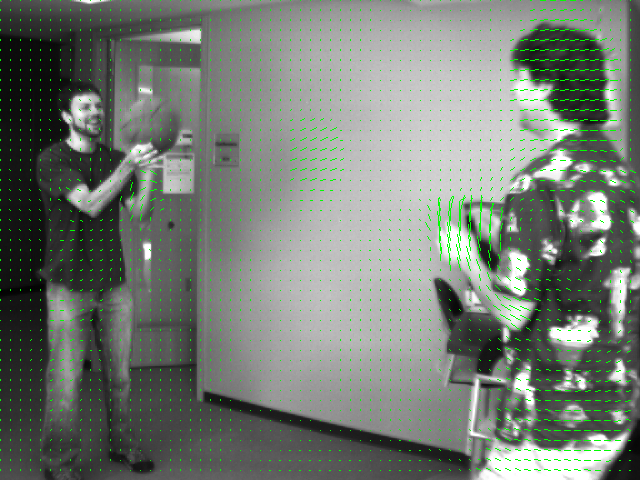

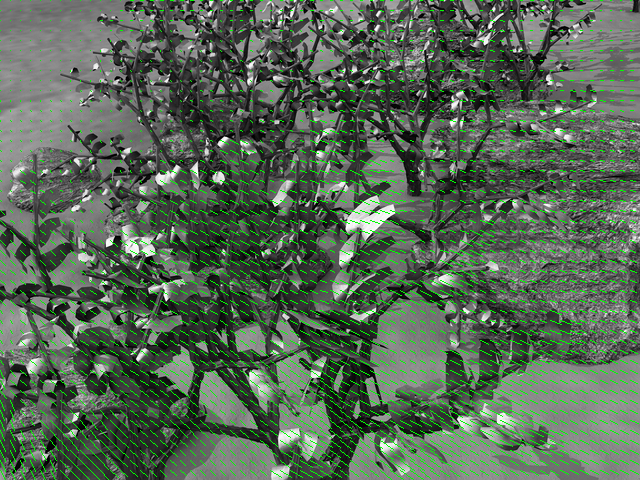

In [ ]:
img1 = cv2.imread('basketball1.png')
img2 = cv2.imread('basketball2.png')
img3 = cv2.imread('grove1.png')
img4 = cv2.imread('grove2.png')
DeepFlow(img1, img2)
DeepFlow(img3,img4)

In [ ]:
def DualTVL1(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    dual_tvl1 = cv2.optflow.createOptFlow_DualTVL1()

    # Calculate optical flow
    flow = dual_tvl1.calc(gray1, gray2, None)

    h, w = flow.shape[:2]
    flow_img = cv2.cvtColor(gray1, cv2.COLOR_GRAY2BGR)
    for y in range(0, h, 10):
        for x in range(0, w, 10):
            dx, dy = flow[y, x]
            cv2.line(flow_img, (x, y), (int(x + dx), int(y + dy)), (0, 255, 0), 1)
    cv2_imshow(flow_img)


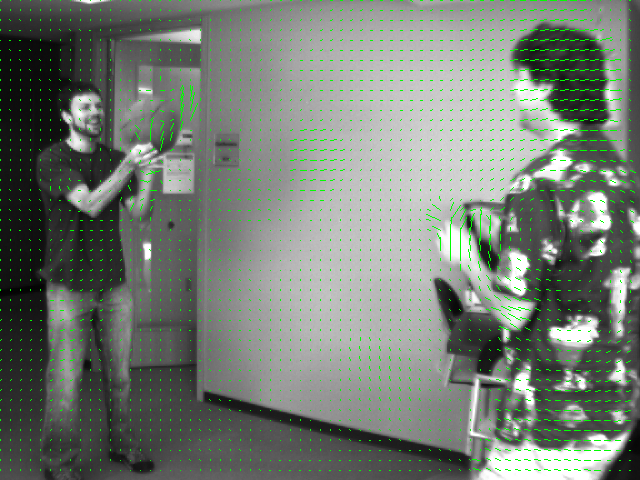

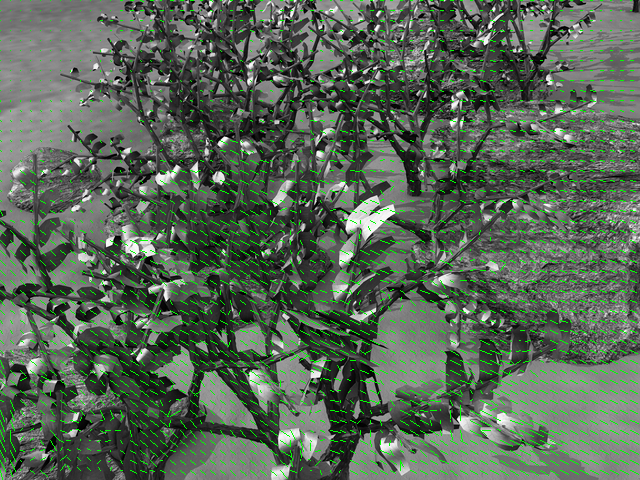

In [ ]:
img1 = cv2.imread('basketball1.png')
img2 = cv2.imread('basketball2.png')
img3 = cv2.imread('grove1.png')
img4 = cv2.imread('grove2.png')
DualTVL1(img1, img2)
DualTVL1(img3,img4)

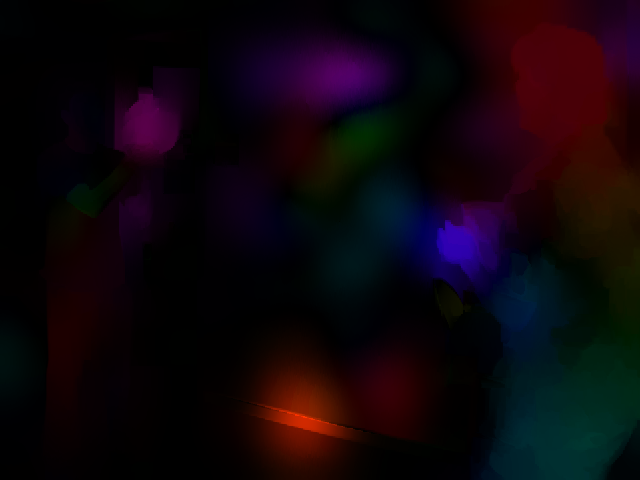

In [19]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

def PCAFlow(img1, img2):
    # Convert images to grayscale
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Create the PCAFlow object
    pca_flow = cv2.optflow.createOptFlow_PCAFlow()

    # Calculate optical flow
    flow = pca_flow.calc(gray1, gray2, None)

    # Calculate magnitude and angle of optical flow vectors
    mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])

    # Set the hue component to the angle (in degrees) normalized to [0, 180]
    hsv = np.zeros((flow.shape[0], flow.shape[1], 3), dtype=np.uint8)
    hsv[..., 0] = ang * 180 / np.pi / 2

    # Set the saturation component to maximum
    hsv[..., 1] = 255

    # Normalize magnitude to [0, 255]
    mag = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    # Set the value component to the magnitude of the flow
    hsv[..., 2] = mag.astype(np.uint8)

    # Convert HSV to BGR for visualization
    flow_img = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

    # Display the flow image
    cv2_imshow(flow_img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

# Example usage
img1 = cv2.imread('basketball1.png')
img2 = cv2.imread('basketball2.png')
PCAFlow(img1, img2)


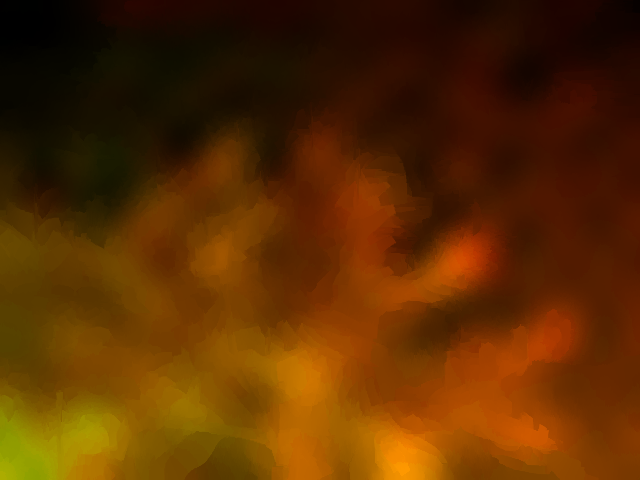

In [20]:
img1 = cv2.imread('grove1.png')
img2 = cv2.imread('grove2.png')
PCAFlow(img1, img2)